In [138]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model

In [142]:
def prepare_country_stats(data_pd_a, data_pd_b):
    cols_a = data_pd_a.columns
    cols_b = data_pd_b.columns
    keys = set(cols_a).intersection(set(cols_b))
    
    data_pd_a.rename(columns={"Value" : "Life satisfaction"}, inplace=True)
    data_pd_b.rename(columns={"2015" : "GDP per capita"}, inplace=True)
    
    return pd.merge(data_pd_b, data_pd_a, on = ['Country']) 

In [143]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', delimiter='\t',
                             encoding='latin1', na_values='n/a') 

In [144]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) 
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]] 

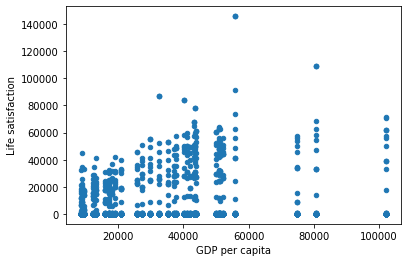

In [146]:
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show() 

In [81]:
model = sklearn.linear_model.LinearRegression()

In [82]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
X_new = [[22587]]
print(model.predict(X_new))

[[3806.22078376]]
